# **Decision Tree**: 

Definition:

Decision Tree is a `Supervised learning technique` that can be used for both `classification and Regression` problems, but mostly it is `preferred for solving Classification problems`.

* It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

* In a Decision Tree, the data is `continuously split according to a certain parameter`.

* The tree can be explained by two entities, namely decision nodes and leaves.
  *  The leaves are the decisions or the final outcomes. And the decision nodes are where the data is split.
  * The tree is built by splitting the data into subsets, and each subset is then split again.


### **Elements of a Decision Tree are**:
1. Node: the point where data splits 
2. Root Node: The top node from where the data divides 
3. Splitting: Process of dividing a node into two or more nodes 
4. Decision Node: An element of Decision tree that splits into further nodes 
5. Internal Node: A Node that is a sub-Node of a Decision Node and itself a Decision Node 
6. Leaf/terminal Node : A node which does not split further. It gives the outcome.

### **Important Terminologies related to Decision Trees**:

1. Entropy: Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data. Entropy can be calculated as:
   * `Entropy(S) = -P(yes) . log2 P(yes) - P(no) . log2 P(no)`
* Interpretation: Entropy is zero when the sample is completely homogeneous and is one when the sample is equally divided.

2. Gini Impurity: Gini impurity is a metric to measure how often a randomly chosen element would be incorrectly identified. It is calculated as:
   * `Gini(S) = 1 - Σ (Pi)^2`

3. Information Gain: Information gain is the decrease in entropy or impurity. It helps to decide the splitting of the node. The attribute with the highest information gain is split first.
   * `Information Gain = Entropy(S) - Σ [(Weighted Avg) . Entropy(each feature)]`

### **Let's see the implimetation of Entropy, Gini Impurity and Information Gain in python:**

In [36]:
import math

# Example Dataset
# Let's say we have a dataset with two classes, A and B
# Suppose in a dataset of 10 elements, 4 are of class A and 6 are of class B

# Number of elements in each class
n_A = 4
n_B = 6
total = n_A + n_B

In [38]:
# let's calculate the probability of each class:

# P(A) = number of elements in A / total number of elements
P_A = n_A / total

# P(B) = number of elements in B / total number of elements
P_B = n_B / total

print(f'P(A) = {P_A}')
print(f'P(B) = {P_B}')

P(A) = 0.4
P(B) = 0.6


## Let's calculate the **Entropy** of the dataset

Entropy = `-P(A) * log2(P(A)) - P(B) * log2(P(B))`

In [39]:
entropy = -P_A * math.log2(P_A) - P_B * math.log2(P_B)
print(f'Entropy = {entropy}')

Entropy = 0.9709505944546686


## Let's calculate the **Gini Impurity**:

Gini Impurity =` 1 - P(A)^2 - P(B)^2`

In [41]:
gini_impurity = 1 - P_A**2 - P_B**2
print(f'Gini Impurity = {gini_impurity}')


Gini Impurity = 0.48


## Let's calculate the **Information Gain**:

Information Gain = `Entropy(parent) - [Weighted Average] * Entropy(children)`

In [49]:
# Information Gain
# Assuming a split on some feature divides the dataset into two subsets

# Entropy and size for each subset
n_1_A, n_1_B = 2, 3
n_2_A, n_2_B = 2, 3


In [50]:

p_1_A = n_1_A / (n_1_A + n_1_B)
p_1_B = n_1_B / (n_1_A + n_1_B)
entropy_1 = -p_1_A * math.log2(p_1_A) - p_1_B * math.log2(p_1_B) if p_1_A and p_1_B else 0

p_2_A = n_2_A / (n_2_A + n_2_B)
p_2_B = n_2_B / (n_2_A + n_2_B)
entropy_2 = -p_2_A * math.log2(p_2_A) - p_2_B * math.log2(p_2_B) if p_2_A and p_2_B else 0

In [51]:
# Calculating information gain
info_gain = entropy - ((n_1_A + n_1_B) / total * entropy_1 + (n_2_A + n_2_B) / total * entropy_2)
print("Information Gain: ", info_gain)

Information Gain:  0.0


Based on our example dataset with two classes (A and B), we have calculated the following values:

1. **Entropy**: The calculated entropy of the dataset is approximately 0.971. This value indicates a moderate level of disorder in the dataset, considering that it's not very close to 0 (which would mean no disorder) and not at its maximum (which would mean complete disorder for a binary classification).

2. **Gini Impurity**: The Gini impurity for the dataset is 0.48. This value, being less than 0.5, suggests some level of purity in the dataset but still indicates a mix of classes A and B.

3. **Information Gain**: The information gain from the chosen split is 0.0. This result implies that the split did not reduce the entropy or disorder of the dataset. In other words, the split did not add any additional information that could help distinguish between classes A and B more effectively than before.

These metrics provide insight into the nature of the dataset and the effectiveness of potential splits when constructing a decision tree. In practical applications, you would use these calculations to choose the best feature and split at each node in the tree to maximize the purity of the subsets created.

---

## **In this notebook**:

we will be working on the `Titanic` Dataset and will use the Decision Tree Classifier to predict the survival of passengers. 

In [1]:
# importing the libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

In [3]:
# loading the dataset:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [6]:
# print the number of missing values in the dataset and the percentage of missing values in the dataset:

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
deck,688,0.772166
age,177,0.198653
embarked,2,0.002245
embark_town,2,0.002245
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [7]:
# drop the deck column:
df = df.drop('deck', axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [8]:
# impute the missing values of embarked and embark_town columns with the most frequent value using SimpleImputer class of sklearn library:

imputer = SimpleImputer(strategy='most_frequent')
df['embarked'] = imputer.fit_transform(df['embarked'].values.reshape(-1, 1)).flatten()
df['embark_town'] = imputer.fit_transform(df['embark_town'].values.reshape(-1, 1)).flatten()

In [9]:
# impute age using SimpleImputer from sklearn:

imputer = SimpleImputer(strategy='median')
df['age'] = imputer.fit_transform(df['age'].values.reshape(-1, 1))


In [10]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### now, all the columns containing missing values are imputed!

In [14]:
# Encode the categorical and object columns using for loop with LabelEncoder class of sklearn library:

label = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = label.fit_transform(df[col])
        

In [15]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int64  
 8   class        891 non-null    int64  
 9   who          891 non-null    int64  
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    int64  
 12  alive        891 non-null    int64  
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(10)
memory usage: 85.4 KB


In [17]:
# split the dataset into features and target variable:

X = df.drop('survived', axis=1)
y = df['survived']

In [18]:
# split the dataset into training and testing sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# call the model:

model = DecisionTreeClassifier()

# fit the model:

model.fit(X_train, y_train)

# make predictions:

y_pred = model.predict(X_test)

In [19]:
# evaluate the model:

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[105   0]
 [  0  74]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



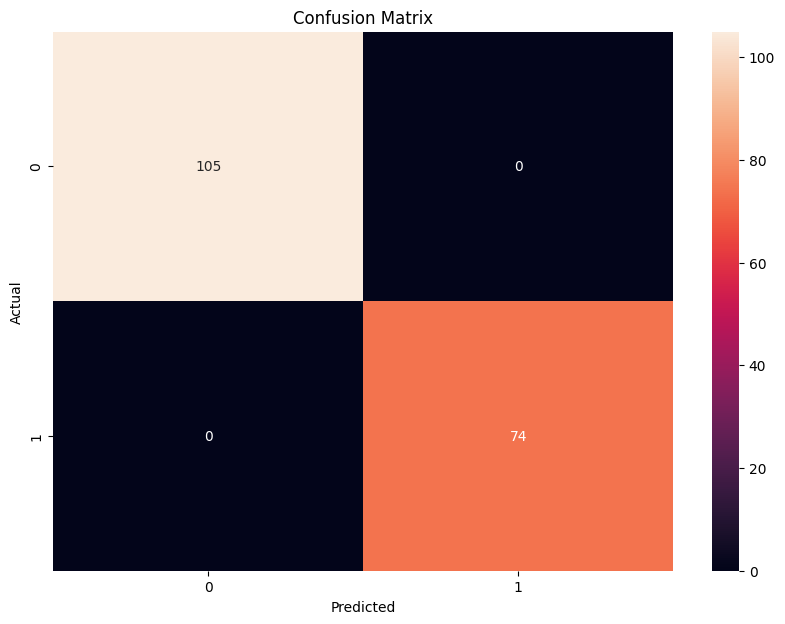

In [20]:
# plot the confusion matrix using seaborn heatmap:

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Save the decision tree model:

from sklearn.tree import export_graphviz
export_graphviz(model, out_file='./models/Decision_tree_Classifier_01.dot', feature_names=X.columns, filled=True, rounded=True)

### We are getting 100% accuracy on the test set as the decision tree is relying on the alive column which is direclty related to our target column (survived).
## so we will remove the alive column from feature column and retrain the model.

Accuracy: 0.994413407821229
Confusion Matrix:
 [[105   0]
 [  1  73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       1.00      0.99      0.99        74

    accuracy                           0.99       179
   macro avg       1.00      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179



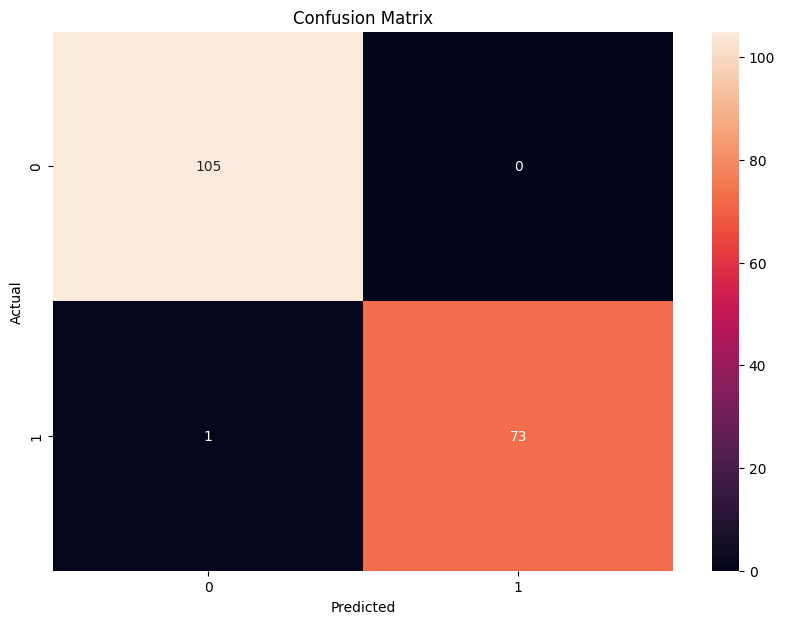

In [34]:
# split the feature and the target:
X = df.drop(['survived', 'alive'], axis=1)
y = df['survived']

# split the dataset into training and testing sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# call the model:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

#fit the model:
model.fit(X, y)

# make predictions:
y_pred = model.predict(X_test)

# evaluate the model:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# plot the confusion matrix using seaborn heatmap:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [35]:
# save the model:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='./models/Decision_tree_Classifier_02.dot', feature_names=X.columns, filled=True, rounded=True)

---
# **Oline Visualization Tool**:

You can visualize the decision tree using the online tool.

Link: [Click here!](https://graphviz.net/tabs/tab1)
---
 **OR**
  ---

Link: [Click here!](https://dreampuf.github.io/GraphvizOnline/)
---

---

#### this time we used Decision tree classifier defined some parameters and we got better results. 
> What I did:

* I have used the Decision Tree Classifier to predict the survival of passengers.
* I have used the `train_test_split` function to split the dataset into training and testing sets.
* I have used the `accuracy_score` to evaluate the model performance.
* I have used the `confusion_matrix` to check the performance of the model.
* I have used the `classification_report` to check the performance of the model.
* I have used the `plot_tree` function to visualize the Decision Tree.
* I have used the `export_graphviz` function to visualize the Decision Tree.
* I have used the `Entropy` as the criterion to split the data.
* I haven't used the `max_depth` parameter to control the depth of the tree which means that the tree will grow until all leaves are pure.
* I have used the `random_state` parameter to set the seed.

---

# About Me:

<img src="https://scontent.flhe6-1.fna.fbcdn.net/v/t39.30808-6/449152277_18043153459857839_8752993961510467418_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=6slHzGIxf0EQ7kNvgEeodY9&_nc_ht=scontent.flhe6-1.fna&oh=00_AYCiVUtssn2d_rREDU_FoRbXvszHQImqOjfNEiVq94lfBA&oe=66861B78" width="30%">

**Muhammd Faizan**

3rd Year BS Computer Science student at University of Agriculture, Faisalabad.\
Contact me for queries/collabs/correction

[Kaggle](https://www.kaggle.com/faizanyousafonly/)\
[Linkedin](https://www.linkedin.com/in/mrfaizanyousaf/)\
[GitHub](https://github.com/faizan-yousaf/)\
[Email] faizan6t45@gmail.com or faizanyousaf815@gmail.com \
[Phone/WhatsApp]() +923065375389